In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('SMSSpamCollection.csv')
df.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df['Class'].value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [4]:
df['Class'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: Class, dtype: float64

In [5]:
df['Class'] = df['Class'].map({'ham':0,'spam':1})

In [6]:
df.head()

,Class,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
y=df['Class']
X=df['sms']
print(y.shape,X.shape)

(5572,) (5572,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [10]:
vect.fit(X_train)
X_traint= vect.transform(X_train)
X_testt= vect.transform(X_test)

In [11]:
X_traint.shape

(3900, 7004)

In [12]:
vect.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [13]:
from platform import python_version

In [14]:
python_version()

'3.8.5'

In [15]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,roc_curve

In [16]:
from sklearn.naive_bayes import MultinomialNB
mnb= MultinomialNB()

In [17]:
mnb.fit(X_traint,y_train)

y_train_pred=mnb.predict(X_traint)
y_train_prob=mnb.predict_proba(X_traint)[:,1]

print('Train')
print('Confusion Matrix:\n',confusion_matrix(y_train,y_train_pred))
print('\nAccuracy Score:',accuracy_score(y_train,y_train_pred))
print('AUC:',roc_auc_score(y_train,y_train_prob))

Train
Confusion Matrix:
 [[3363   14]
 [   8  515]]

Accuracy Score: 0.9943589743589744
AUC: 0.998299711636076


In [18]:
y_test_pred=mnb.predict(X_testt)
y_test_prob=mnb.predict_proba(X_testt)[:,1]

print('Test')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_test_pred))
print('\nAccuracy Score:',accuracy_score(y_test,y_test_pred))
print('AUC:',roc_auc_score(y_test,y_test_prob))

Test
Confusion Matrix:
 [[1438   10]
 [  11  213]]

Accuracy Score: 0.9874401913875598
AUC: 0.9851950966850829


In [19]:
fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)

In [20]:
thresholds[0]=thresholds[0]-1

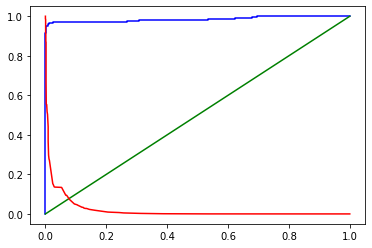

In [21]:
plt.plot(fpr,tpr,"b")
plt.plot(fpr,fpr,"g")
plt.plot(fpr,thresholds,'r')
plt.show()

In [22]:
spm = pd.DataFrame({'fpr':fpr,'tpr':tpr,'thresholds':thresholds})
spm.head()

,fpr,tpr,thresholds
0,0.0,0.000000,1.0
1,0.0,0.276786,1.0
2,0.0,0.321429,1.0
3,0.0,0.339286,1.0
4,0.0,0.343750,1.0


In [23]:
spm[spm['fpr']==0]

,fpr,tpr,thresholds
0,0.0,0.000000,1.000000
1,0.0,0.276786,1.000000
2,0.0,0.321429,1.000000
3,0.0,0.339286,1.000000
4,0.0,0.343750,1.000000
5,0.0,0.352679,1.000000
6,0.0,0.357143,1.000000
7,0.0,0.370536,1.000000
8,0.0,0.375000,1.000000
9,0.0,0.388393,1.000000


In [24]:
spm[(spm['fpr']==0) & (spm['tpr']>0.5)]

,fpr,tpr,thresholds
16,0.0,0.723214,0.999999
17,0.0,0.732143,0.999998
18,0.0,0.758929,0.999991
19,0.0,0.767857,0.999990
20,0.0,0.799107,0.999956
21,0.0,0.808036,0.999950
22,0.0,0.816964,0.999923
23,0.0,0.825893,0.999918
24,0.0,0.915179,0.986525
